In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scc import strongly_connected_components, critical_cycles, cyclicite, denardo_algorithm, denardo_period
from matrice import calcul_matrix
from graph import draw_graph
from tropical_lib import matrix_multiplication, power, calcul_l, calcul_r

In [27]:
from tqdm.notebook import tqdm

In [3]:
m = np.array([[1, 10, 10, 10], [10, 1, 10, 10], [10, 10, 1, 1], [10, 10, 1, 1]])

In [22]:
word = "abac"
inf = float("inf")
mbis = np.array([[inf, inf,  1.,  1.],
                [inf,  1.,  1.,  1.],
                [inf,  2.,  2.,  2.],
                [inf,  inf,  inf,  1.]])

In [54]:
word = "aabbbccc" * 2
m = calcul_matrix(word)
m

array([[inf, inf, inf, inf, inf, inf, inf, inf, inf,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  2.,  2.,  2.,  2.,
         2.,  2.,  2.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  2.,  2.,  2.,  1.,
         1.,  1.,  1.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  3.,  3.,  3.,  2.,
         2.,  2.,  2.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  4.,  4.,  4.,  3.,
         3.,  3.,  3.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  2.,  2.,  2.,  2.,
         2.,  2.,  1.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  3.,  3.,  3.,  3.,
         3.,  3.,  2.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  4.,  4.,  4.,  4.,
         4.,  4.,  3.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  3.,  3.,  3.,  2.,
         2.,  2.,  2.],
       [inf, inf, inf, inf, inf, inf, inf, inf, inf,  4.,  4.,  4.,  3.,
         3.,  3.,  3.],
       [inf, inf, inf, inf, in

In [56]:
n = 8
r = calcul_r(word * n).reshape((2 * n, len(word) // 2))
print((word * n).count("a"))
r

32


array([[ 0,  1,  0,  1,  2,  0,  1,  2],
       [ 1,  2,  1,  2,  3,  2,  3,  4],
       [ 2,  3,  3,  4,  5,  3,  4,  5],
       [ 4,  5,  4,  5,  6,  5,  6,  7],
       [ 5,  6,  6,  7,  8,  6,  7,  8],
       [ 7,  8,  7,  8,  9,  8,  9, 10],
       [ 8,  9,  9, 10, 11,  9, 10, 11],
       [10, 11, 10, 11, 12, 11, 12, 13],
       [11, 12, 12, 13, 14, 12, 13, 14],
       [13, 14, 13, 14, 15, 14, 15, 16],
       [14, 15, 15, 16, 17, 15, 16, 17],
       [16, 17, 16, 17, 18, 17, 18, 19],
       [17, 18, 18, 19, 20, 18, 19, 20],
       [19, 20, 19, 20, 21, 20, 21, 22],
       [20, 21, 21, 22, 23, 21, 22, 23],
       [22, 23, 22, 23, 24, 23, 24, 25]])

In [116]:
n = 8
word = "aba"
r = calcul_r(word * n).reshape((n, len(word)))
r[1:]

array([[2, 1, 2],
       [3, 2, 3],
       [4, 3, 4],
       [5, 4, 5],
       [6, 5, 6],
       [7, 6, 7],
       [8, 7, 8]])

In [6]:
dr = r[1:] - r[:-1]
dr

array([[1, 1, 1, 1, 2, 2],
       [1, 1, 2, 2, 1, 1],
       [2, 2, 1, 1, 2, 2],
       [1, 1, 2, 2, 1, 1],
       [2, 2, 1, 1, 2, 2],
       [1, 1, 2, 2, 1, 1],
       [2, 2, 1, 1, 2, 2]])

In [31]:
r = np.array([[0, 1, 0, 1, 0, 1]])

In [39]:
matrix_multiplication(power(mbis, 2), r.transpose())

array([[2.],
       [3.],
       [3.],
       [4.],
       [4.],
       [5.]])

In [40]:
matrix_multiplication(power(m, 2), r.transpose())

array([[2.],
       [3.],
       [3.],
       [4.],
       [3.],
       [4.]])

In [27]:
all((matrix_multiplication(power(mbis, i), r.transpose()) == matrix_multiplication(power(m, i), r.transpose())).all() for i in range(1, 1000))

True

In [41]:
cyclicite(calcul_matrix("BAACCCCC"))

  0%|          | 0/1024 [08:20<?, ?it/s]


1

In [15]:
len(m.shape)

2

In [9]:
np.array([[0, 0, 1, 0]]).transpose()

array([[0],
       [0],
       [1],
       [0]])

In [17]:
def minimum_distance(graph: np.array):
    n = graph.shape[0]
    dist =  graph.copy()

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

In [26]:
INF = float("inf")


def shortestpath(graph: np.array):
    n = graph.shape[0]
    
    # initializing all distances as -1
    dp = -np.ones((n + 1, n), dtype=np.float64)
 
    # shortest distance From first vertex
    # to in tself consisting of 0 edges
    dp[0, 0] = 0
 
    # filling up the dp table
    for i in range(1, n + 1):
        for j in range(n):
            for k in range(n):
                if graph[k, j] != INF:
                    if dp[i - 1, k] != -1:
                        curr_wt = dp[i - 1, k] + graph[k, j]
                        if dp[i, j] == -1:
                            dp[i, j] = curr_wt
                        else:
                            dp[i, j] = min(dp[i, j], curr_wt)
    return dp
 
# Returns minimum value of average
# weight of a cycle in graph.
def minAvgWeight(graph: np.array):
    n = graph.shape[0]
    dp = shortestpath(graph)
 
    # array to store the avg values
    avg = -np.ones(n, dtype=np.float64)
 
    # Compute average values for all
    # vertices using weights of
    # shortest paths store in dp.
    for i in range(n):
        if (dp[n][i] != -1):
            for j in range(n):
                if (dp[j][i] != -1):
                    avg[i] = max(avg[i], (dp[n][i] -
                                          dp[j][i]) / (n - j))
 
    return avg

In [2]:
m = calcul_matrix("aabbcc")

In [3]:
scc = strongly_connected_components(m)
lscc = [(len(c), i) for i, c in enumerate(scc)]
lscc.sort()
all(length == 1 for length, _ in lscc[:-1])

True

In [4]:
critical_cycles(m)

{(1, 2, 3, 4, 5): [([1, 3], 2)], (0,): []}

In [5]:
denardo_period(m)

1

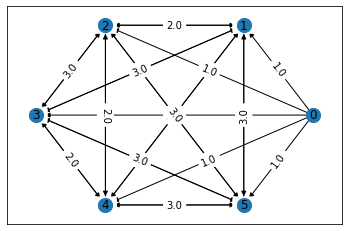

In [29]:
draw_graph("aabbcc")

In [30]:
calcul_matrix("aabbcc")

array([[inf,  1.,  1.,  1.,  1.,  1.],
       [inf,  2.,  2.,  2.,  2.,  2.],
       [inf,  2.,  2.,  1.,  1.,  1.],
       [inf,  3.,  3.,  2.,  2.,  2.],
       [inf,  2.,  2.,  2.,  2.,  1.],
       [inf,  3.,  3.,  3.,  3.,  2.]])

In [13]:
def pente(vec: np.array, period: int):
    
    assert (
        (vec[-period:] - vec[-2 * period: -period]) 
        == 
        (vec[-2 * period: -period] - vec[-3 * period: -2 * period])
            ).all(), "Le vecteur n'est pas périodique"
    return (vec[-1] - vec[-period - 1]) / period

In [14]:
def plot_r_l_m(word: str, n=10, max_period=2):
    r = calcul_r(word * n)
    l = calcul_l(word * n)

    ar = pente(r, max_period * len(word))
    al = -pente(l[::-1], max_period * len(word))

    rl = r + l
    i = rl.max()
    plt.plot(range(len(word) * n), r, label="r", color="blue")
    plt.plot(range(len(word) * n), ar * np.arange(len(word) * n), label=f"r-tendance {ar * len(word)}", color="blue", alpha=0.5)
    plt.plot(range(len(word) * n), l, label="l", color="orange")
    plt.plot(range(len(word) * n), al * np.arange(len(word) * n) + l.max(), label=f"l-tendance {al * len(word)}", color="orange", alpha=0.5)
    plt.plot(range(len(word) * n), rl, label="r + l")
    plt.axhline(i, label="m - 1", color='red', alpha=0.5)
    plt.title(word)
    plt.legend()


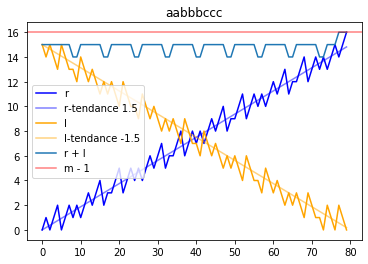

In [62]:
plot_r_l_m("aabbbccc")

In [44]:
def pente_equal(word: str, n=10, max_period=2):
    r = calcul_r(word * n)
    l = calcul_l(word * n)

    try:
        ar = pente(r, max_period * len(word))
    except AssertionError:
        input(f"{word} n'est a priori pas de période inférieure à {max_period}")
    al = pente(l[::-1], max_period * len(word))

    return ar == al


In [6]:
def to_base(n, base=2):
    res = ""
    while n:
        n, r = divmod(n, base)
        res = chr(r + 65) + res
    return res

In [105]:
pente_equal("abbabbbcba")

True

In [107]:
bin(4564)[2:]

'1000111010100'

In [115]:
all(pente_equal(bin(i)[2:]) for i in tqdm(range(2 ** 18)))


100%|██████████| 262144/262144 [07:07<00:00, 613.25it/s]


True

In [22]:
%%time
all(pente_equal(to_base(i, 2)) for i in range(1, 2 ** 14))

CPU times: user 19.5 s, sys: 8.25 ms, total: 19.5 s
Wall time: 19.5 s


True

In [24]:
%%time
all(
    pente_equal(bin(i)[2:]) for i in range(2 ** 14)
    )

CPU times: user 19.4 s, sys: 12.8 ms, total: 19.4 s
Wall time: 19.4 s


True

In [50]:
all(pente_equal(to_base(i, 3)) for i in tqdm(range(1, 3 ** 10)))

True

In [49]:
all(pente_equal(to_base(i, 4), max_period=6, n=25) for i in tqdm(range(1, 4 ** 9)))

True

In [53]:
all(pente_equal(to_base(i, 5), max_period=12, n=40) for i in tqdm(range(1, 5 ** 7)))

True

In [58]:
all(pente_equal(to_base(i, 6), max_period=60, n=200) for i in tqdm(range(1, 6 ** 5)))

True

In [61]:
all(pente_equal(to_base(i, 7), max_period=60, n=200) for i in tqdm(range(1, 7 ** 5)))

True

In [48]:
cyclicite(calcul_matrix("BAACCB"))

2

In [60]:
np.lcm(60, 6)

60